In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the training data

In [2]:
file_path = r"D:\LIUZHICHENG\Udemy\Machine Learning\Classification Bootmap\ML Classification Package\3. Logisitic Regression\Train_Titanic.csv"
df_train = pd.read_csv(file_path)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_train.shape

(891, 12)

In [4]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## EDA

In [5]:
df_train["Survived"].value_counts() / len(df_train) * 100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

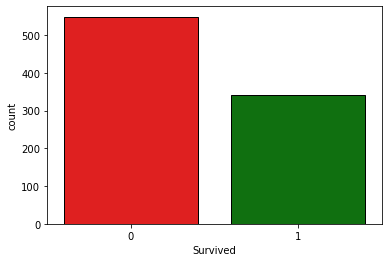

In [6]:
sns.countplot(data=df_train, x="Survived", palette={0: "red", 1: "green"}, edgecolor="black");

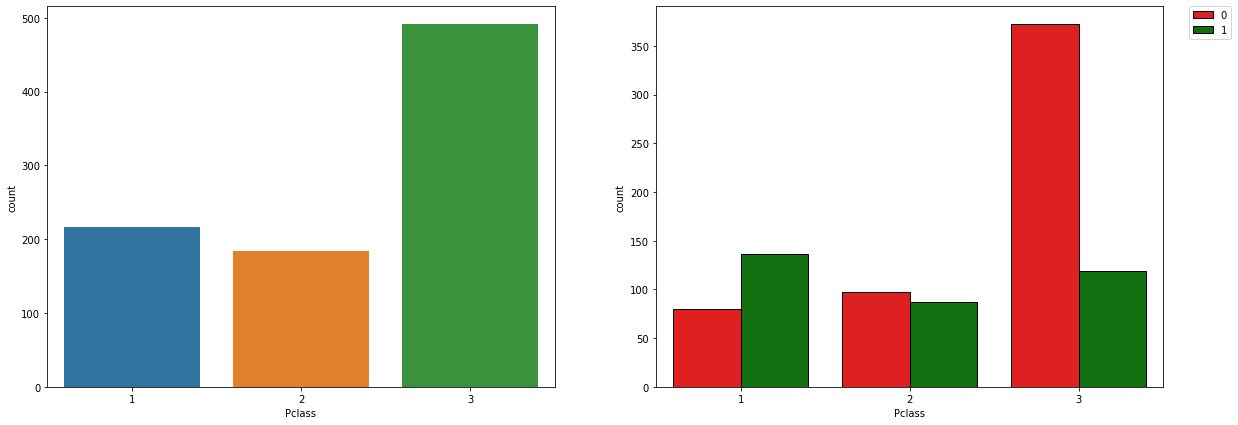

In [7]:
plt.figure(figsize=(20, 7))

plt.subplot(1, 2, 1)
sns.countplot(data=df_train, x="Pclass")

plt.subplot(1,2, 2)
sns.countplot(data=df_train, x="Pclass", hue="Survived", palette={0: "red", 1: "green"}, edgecolor="black")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0);

No handles with labels found to put in legend.


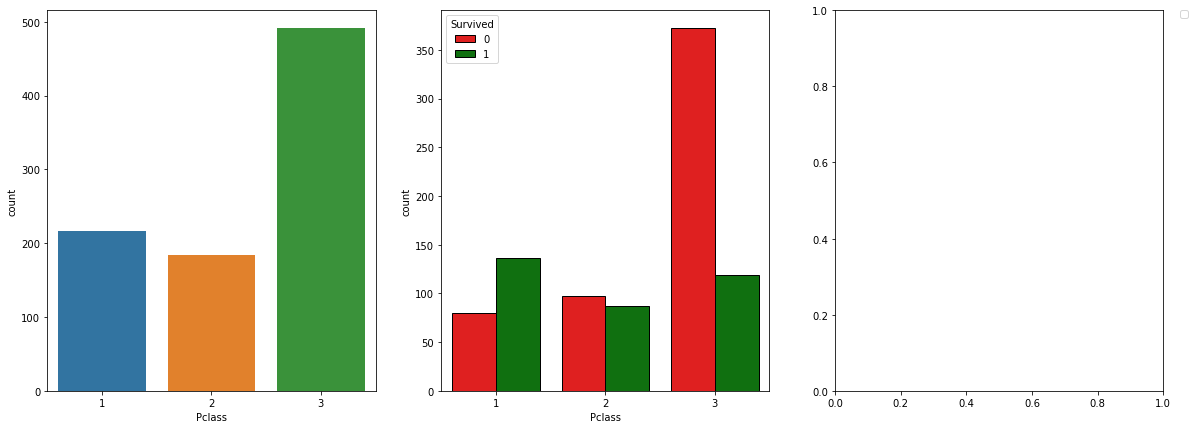

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(20, 7))

sns.countplot(ax=ax[0], data=df_train, x="Pclass")

sns.countplot(ax=ax[1], data=df_train, x="Pclass", hue="Survived", palette={0: "red", 1: "green"}, edgecolor="black")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0);

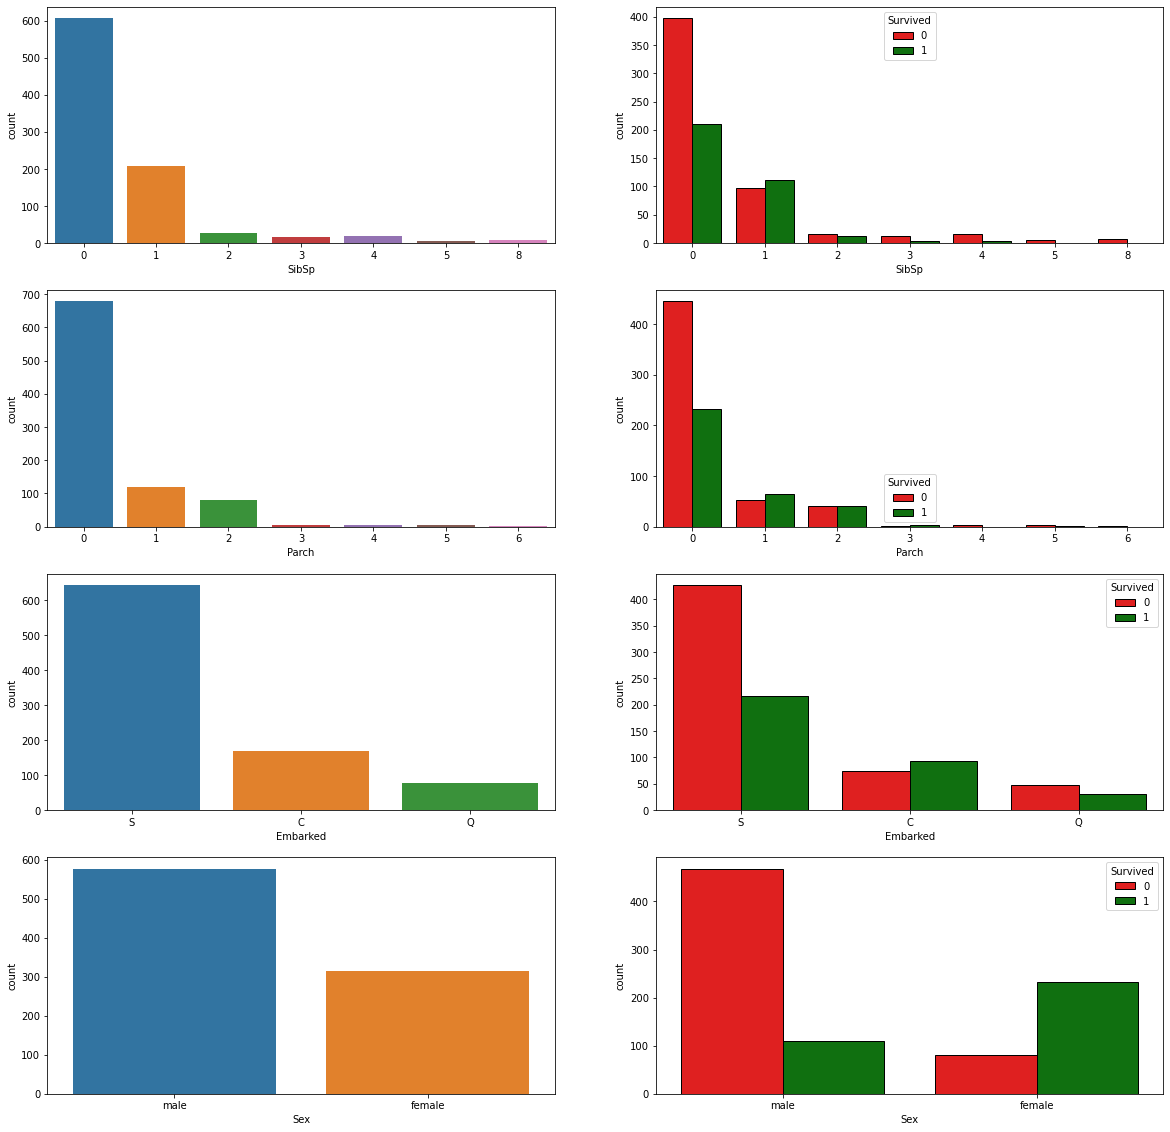

In [9]:
fig, ax = plt.subplots(4, 2, figsize=(20, 20))

sns.countplot(ax=ax[0][0], data=df_train, x="SibSp")
sns.countplot(ax=ax[0][1], data=df_train, x="SibSp", hue="Survived", palette={0: "red", 1: "green"}, edgecolor="black")

sns.countplot(ax=ax[1][0], data=df_train, x="Parch")
sns.countplot(ax=ax[1][1], data=df_train, x="Parch", hue="Survived", palette={0: "red", 1: "green"}, edgecolor="black")

sns.countplot(ax=ax[2][0], data=df_train, x="Embarked")
sns.countplot(ax=ax[2][1], data=df_train, x="Embarked", hue="Survived", palette={0: "red", 1: "green"}, edgecolor="black");

sns.countplot(ax=ax[3][0], data=df_train, x="Sex")
sns.countplot(ax=ax[3][1], data=df_train, x="Sex", hue="Survived", palette={0: "red", 1: "green"}, edgecolor="black");

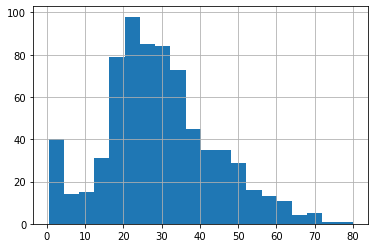

In [10]:
df_train["Age"].hist(bins=20);

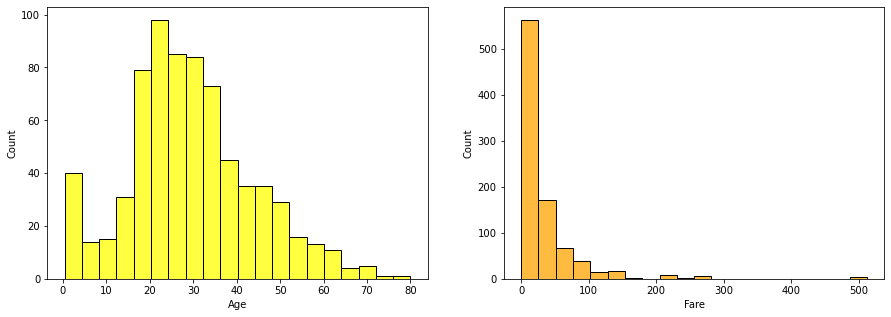

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(ax=ax[0], data=df_train, x="Age", bins=20, color="yellow")

sns.histplot(ax=ax[1], data=df_train, x="Fare", bins=20, color="orange");

## Data preprocessing

###### data cleaning

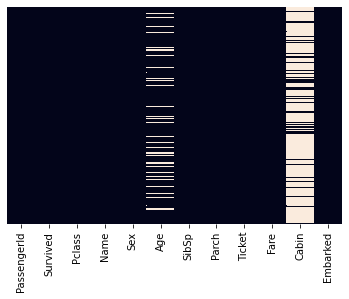

In [12]:
sns.heatmap(df_train.isna(), yticklabels=False, cbar=False, annot=False);

In [13]:
# Drop "PassengerId", "Name", "Ticket", "Cabin", "Embarked"
df_train.drop(columns=["PassengerId", "Name", "Ticket", "Cabin", "Embarked"], inplace=True)

In [14]:
avg_male_age = np.mean(df_train[df_train["Sex"]=="male"]["Age"])
avg_female_ag = np.mean(df_train[df_train["Sex"]=="female"]["Age"])

def fill_age(df):
    if pd.isnull(df["Age"]):
        if df["Sex"] == "male":
            return avg_male_age
        elif df["Sex"] == "female":
            return avg_female_ag
    else:
        return df["Age"]

In [15]:
df_train["Age"] = df_train.apply(func=fill_age, axis=1)

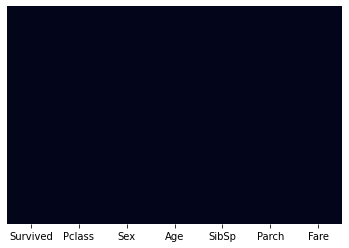

In [16]:
sns.heatmap(df_train.isna(), yticklabels=False, cbar=False, annot=False);

###### pd.get_dummies

In [17]:
df_train = pd.get_dummies(data=df_train, columns=["Sex"], drop_first=True)
df_train

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,0,3,22.000000,1,0,7.2500,1
1,1,1,38.000000,1,0,71.2833,0
2,1,3,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,0,3,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1
887,1,1,19.000000,0,0,30.0000,0
888,0,3,27.915709,1,2,23.4500,0
889,1,1,26.000000,0,0,30.0000,1


## Model Training

In [18]:
X = df_train.drop(labels="Survived", axis=1).to_numpy()
X

array([[ 3.        , 22.        ,  1.        ,  0.        ,  7.25      ,
         1.        ],
       [ 1.        , 38.        ,  1.        ,  0.        , 71.2833    ,
         0.        ],
       [ 3.        , 26.        ,  0.        ,  0.        ,  7.925     ,
         0.        ],
       ...,
       [ 3.        , 27.91570881,  1.        ,  2.        , 23.45      ,
         0.        ],
       [ 1.        , 26.        ,  0.        ,  0.        , 30.        ,
         1.        ],
       [ 3.        , 32.        ,  0.        ,  0.        ,  7.75      ,
         1.        ]])

In [19]:
y = df_train["Survived"].values
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [22]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       117
           1       0.73      0.73      0.73        62

    accuracy                           0.81       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179

[[100  17]
 [ 17  45]]
0.8100558659217877


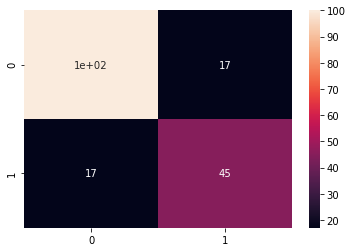

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

predictions = clf_lr.predict(X_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))
sns.heatmap(data=confusion_matrix(y_test, predictions), annot=True);

In [24]:
clf_lr.coef_

array([[-0.98067489, -0.03442363, -0.45581234, -0.12721041,  0.00283089,
        -2.60962767]])

###### k-fold cross validation

In [25]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=clf_lr, X=X_train, y=y_train, cv=10, verbose=1)
print(accuracies)
print(f"""Mean: {np.round(np.mean(accuracies*100), 2)}%""")
print(f"""Std: {np.round(np.std(accuracies*100), 2)}%""")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[0.76388889 0.76388889 0.84507042 0.8028169  0.76056338 0.76056338
 0.73239437 0.87323944 0.78873239 0.83098592]
Mean: 79.22%
Std: 4.26%


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


## Testing Holdout Dataset

In [26]:
file_path = r"D:\LIUZHICHENG\Udemy\Machine Learning\Classification Bootmap\ML Classification Package\3. Logisitic Regression\Test_Titanic.csv"
df_holdout = pd.read_csv(file_path)
df_holdout.dropna(axis=0, how="any", inplace=True)

In [27]:
df_holdout.drop(columns=["PassengerId", "Name", "Ticket", "Cabin", "Embarked"], inplace=True)

In [28]:
avg_male_age = np.mean(df_holdout[df_holdout["Sex"]=="male"]["Age"])
avg_female_ag = np.mean(df_holdout[df_holdout["Sex"]=="female"]["Age"])

def fill_age(df):
    if pd.isnull(df["Age"]):
        if df["Sex"] == "male":
            return avg_male_age
        elif df["Sex"] == "female":
            return avg_female_ag
    else:
        return df["Age"]

df_holdout["Age"] = df_holdout.apply(func=fill_age, axis=1)

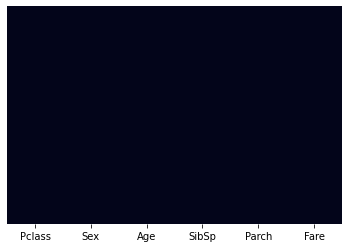

In [29]:
sns.heatmap(df_holdout.isna(), yticklabels=False, cbar=False, annot=False);

In [30]:
df_holdout = pd.get_dummies(data=df_holdout, columns=["Sex"], drop_first=True)
df_holdout

,Pclass,Age,SibSp,Parch,Fare,Sex_male
12,1,23.0,1,0,82.2667,0
14,1,47.0,1,0,61.1750,0
24,1,48.0,1,3,262.3750,0
26,1,22.0,0,1,61.9792,0
28,1,41.0,0,0,30.5000,1
...,...,...,...,...,...,...
404,1,43.0,1,0,27.7208,1
405,2,20.0,0,0,13.8625,1
407,1,50.0,1,1,211.5000,1
411,1,37.0,1,0,90.0000,0


In [31]:
clf_lr.predict(df_holdout.to_numpy())

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1],
      dtype=int64)